# Google Analytics Customer Revenue Prediction

## Introduksjon
Denne oppgaven er hentet fra følgende adresse: https://www.kaggle.com/c/ga-customer-revenue-prediction
Som oppgaveteksten fra Kaggle beskriver gjelder 80/20-regelen, der 20% av kundene står for mesteparten av inntekten. For å markedsføre ut til riktig målgruppe, gjøres det en prediksjon av inntjening per kunde, her basert på et datasett fra en butikk som selger Google-merch.

## Set-up
### Nødvendige importsetninger
Importerer nødvendige biblioteker.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize

### Laste inn data
Datasettet vi bruker er gitt på Kaggle: https://www.kaggle.com/c/ga-customer-revenue-prediction/data
Settene kan lastes ned fra denne lenken og lagres lokalt på maskinen. Vi har brukt settene test og train. Ved å bruke pandas read-funksjon laster vi inn trenings- og testsettet som dataframes.

### Formattere data: flate ut JSON 
Ser at kolonnene device, geoNetwork, totals og trafficsource består av flere underkolonner i JSON-format. Disse må «flates ut» og håndteres som egne separerte kolonner for at det skal kunne være mulig å jobbe med de senere. Dette gjøres ved å bruke funksjonen flatten_json som tar inn et datasett og en tabell med kolonner som har flere kolonner i hver kolonne.

In [2]:
#Kolonner i datasettet som er av typen Json, og må flates ut.
json_columns = [
    'device', 'geoNetwork', 'totals', 'trafficSource'
]
train_path ='../oblig_4/data/train.csv'

In [3]:
load_train = pd.read_csv(train_path, converters={column: json.loads for column in json_columns},
                    dtype={'fullVisitorId':'str'})

In [4]:
# Kilde: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html?highlight=json_normalize
# Kilde: https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields
# Kilde: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge
def flatten_json(df, json_columns):
    
    for column in json_columns:
        # Normaliserer json-data til en flat tabell.
        column_as_ch = json_normalize(df[column])
        
        # Navngir de nye subkolonnene som kommer av normaliseringen.
        column_as_ch.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_ch.columns]
        
        # Dropper den gamle kolonnen, fletter de nye kolonnene inn i chunken.
        df = df.drop(column, axis=1).merge(column_as_ch, right_index=True, left_index=True)
    return df

In [5]:
train = flatten_json(load_train, json_columns) #Henter datasett og transformerer json-kolonner.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

In [7]:
train.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device_browser                                            0
device_browserVersion                                     0
device_browserSize                                        0
device_operatingSystem                                    0
device_operatingSystemVersion                             0
device_isMobile                                           0
device_mobileDeviceBranding                               0
device_mobileDeviceModel                                  0
device_mobileInputSelector              

In [8]:
pd.set_option('display.max_columns', None)
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

Lager et «dropp-sett» som inneholder alle kolonnene vi da ikke vil ha med i treningssettet, basert på tidligere:

In [9]:
train = train.drop([
    'trafficSource_adwordsClickInfo.page', 
    'trafficSource_adwordsClickInfo.slot', 
    'trafficSource_adwordsClickInfo.gclId',
    'trafficSource_adwordsClickInfo.adNetworkType',
    'trafficSource_adwordsClickInfo.isVideoAd',
    'trafficSource_keyword',
    'trafficSource_campaign',
    'trafficSource_adwordsClickInfo.criteriaParameters',
    'trafficSource_adContent',
    'trafficSource_campaignCode',
    'trafficSource_source',
    'device_browserVersion',
    'device_browserSize',
    'device_operatingSystemVersion',
    'device_mobileDeviceBranding',
    'device_mobileDeviceModel',
    'device_mobileInputSelector',
    'device_mobileDeviceInfo',
    'device_mobileDeviceMarketingName',
    'device_flashVersion',
    'device_language',
    'device_screenColors',
    'device_screenResolution',
    'geoNetwork_latitude',
    'geoNetwork_longitude',
    'geoNetwork_metro',
    'geoNetwork_cityId',
    'geoNetwork_city',
    'geoNetwork_region',
    'geoNetwork_networkLocation',
    'geoNetwork_networkDomain',
    'geoNetwork_subContinent',
    'date',
    'visitStartTime',
    'sessionId',
    'trafficSource_medium',
    'trafficSource_referralPath'
], axis = 1)

In [10]:
# Etter fjerning
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   channelGrouping             903653 non-null  object
 1   fullVisitorId               903653 non-null  object
 2   socialEngagementType        903653 non-null  object
 3   visitId                     903653 non-null  int64 
 4   visitNumber                 903653 non-null  int64 
 5   device_browser              903653 non-null  object
 6   device_operatingSystem      903653 non-null  object
 7   device_isMobile             903653 non-null  bool  
 8   device_deviceCategory       903653 non-null  object
 9   geoNetwork_continent        903653 non-null  object
 10  geoNetwork_country          903653 non-null  object
 11  totals_visits               903653 non-null  object
 12  totals_hits                 903653 non-null  object
 13  totals_pageviews            9

In [11]:
train['fullVisitorId'].astype('float')

0         1.131660e+18
1         3.773060e+17
2         3.895546e+18
3         4.763447e+18
4         2.729444e+16
              ...     
903648    5.123779e+18
903649    7.231729e+18
903650    5.744577e+18
903651    2.709355e+18
903652    8.149002e+17
Name: fullVisitorId, Length: 903653, dtype: float64

## Forberede data for maskinlæringsmodeller
Rengjøring av dataene har allerede blitt gjort i noe grad, men vi skal gjøre et par ting til før den er klar for modellene. Fra tidligere ser vi at kolonnen fullVisitorId fortsatt er av typen objekt. Vi ønsker å gjøre denne om til et flyttall, da det er ID vi skal bruke sammen med faktisk inntekt for å predikere:


### Pycaret 
PyCaret er et bibliotek vi bruker som hjelper oss med å rengjøre og forbedrede data, men også valg av modeller. For utvidet dokumentasjon, se: https://pycaret.org/

In [12]:
from pycaret.regression import *

Ting som kan tas med i setup av PyCaret:
* sample_estimator: 
    - Trener og evaluerer på samples fra datasettet. Kan brukes til å evaluere hvilken samplestørrelse som er best å bruke.
* numeric_imputation:
    - Fyll ut manglende numeriske verdier med enten 'mean' eller 'median'.
* categorical_imputation: 
    - Fyll ut manglende kategoriske verdier. To muligheter, 'constant' som fyller inn 'not_available', eller 'mode', som fyller inn den mest frekvente verdien.
* 

#### High cardinality list
Denne listen består av kolonner som har mange forskjellige verdier i de ulike radene (for eksempel antall sidevisninger). Ved å bruke high cardinality representeres verdier som forekommer ofte som høye tall, og verdier som forekommer sjeldent som lavere tall. 

In [13]:
high_cardinality_list = [
    'geoNetwork_country',
    'geoNetwork_continent',
    'totals_pageviews',
    'totals_hits'
]

#### Set-up
Setup() i pycaret er en omfattende, der man kan bruke mange forskjellige funksjoner inne i setup-funksjonen. For vår del gjelder følgende: 
-	Train: treningssettet
-	Target:det vi skal trene på
-   Cardinality_list: listen med kolonnene med høy
    kardinalitet
-	Normalize: normaliserer verdiene 
-	Feature_selection: tar kun med de kolonnene som er mest relevante for prediksjon
-	Ignore_features: ser bort i fra ID-kolonnen


In [14]:
#Initialiser pycaret
exp_reg = setup(
    train, 
    target = 'totals_transactionRevenue',
    high_cardinality_features = high_cardinality_list,
    normalize = True,
    feature_selection = True,
    ignore_features = ['fullVisitorId', 'visitId'],
    remove_outliers = True,
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4153
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(903653, 18)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,14
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [15]:
exp_reg[0].columns

Index(['channelGrouping_Paid Search', 'totals_newVisits_1',
       'device_operatingSystem_Windows',
       'trafficSource_isTrueDirect_not_available',
       'device_operatingSystem_Linux', 'device_browser_Safari', 'totals_hits',
       'totals_newVisits_not_available', 'device_operatingSystem_Macintosh',
       'totals_pageviews', 'channelGrouping_Referral',
       'device_operatingSystem_Chrome OS', 'trafficSource_isTrueDirect_True',
       'geoNetwork_country', 'visitNumber', 'channelGrouping_Organic Search',
       'channelGrouping_Display', 'device_deviceCategory_mobile',
       'device_operatingSystem_iOS', 'channelGrouping_Direct',
       'device_operatingSystem_Android', 'geoNetwork_continent',
       'device_isMobile_False', 'device_browser_Firefox',
       'device_deviceCategory_desktop', 'device_browser_Chrome'],
      dtype='object')

## Velge en modell og trene den
Bruker compare_models() til å sammenligne forskjellige modeller med hverandre (MAE, MSE, RMSE, R2, RMSLE, MAPE for pycares regression).
Oppgaven spesifiserer at vi skal buke log n for summen av hver bruker, derfor velger vi å se på RMSLE. Bruker Passive Aggressive Regressor, Support Vector Machine, Gradient Boosting Regressor, Elastic Net og CatBoost Regressor i funksjonen create_model for å lage en modell basert på hver av disse.

In [16]:
comparing_models = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Elastic Net,1248.4660,2132367.5621,1459.9397,0.0011,0.9695,5.5237,0.0120
1,Bayesian Ridge,1248.2644,2132614.7042,1460.0241,0.0010,0.9696,5.5231,0.0153
2,Support Vector Machine,1249.3017,2134341.0817,1460.6080,0.0002,0.9684,5.5240,2.3693
3,Orthogonal Matching Pursuit,1248.1844,2134630.4712,1460.7056,0.0000,0.9700,5.5797,0.0076
4,AdaBoost Regressor,1249.8272,2136143.4191,1461.2083,-0.0006,0.9713,5.5667,0.1217
5,Lasso Regression,1248.0398,2135968.1338,1461.1647,-0.0006,0.9700,5.5294,0.0220
6,Least Angle Regression,1248.3264,2137300.1255,1461.6229,-0.0012,0.9701,5.5341,0.0134
7,Lasso Least Angle Regression,1250.5163,2137550.7576,1461.7062,-0.0013,0.9699,5.5548,0.0065
8,Ridge Regression,1248.2131,2137641.5015,1461.7406,-0.0014,0.9701,5.5232,0.0082
9,Linear Regression,1248.7826,2139071.9715,1462.2307,-0.0020,0.9703,5.5301,0.0089


In [17]:
for i in comparing_models:
    print(type(i))

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
<class 'sklearn.linear_model._bayes.BayesianRidge'>
<class 'sklearn.svm._classes.SVR'>
<class 'sklearn.linear_model._omp.OrthogonalMatchingPursuit'>
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>


**Elastic net:**

In [18]:
model_elastic = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1293.3831,2288621.7459,1512.8191,0.0058,0.9760,3.7248
1,1261.7575,2141120.6718,1463.2569,0.0023,0.9180,6.1050
2,1249.6610,2142938.9329,1463.8780,-0.0047,0.9365,4.8648
3,1268.5012,2189644.4425,1479.7447,0.0025,0.9341,1.9923
4,1195.7936,1945637.7053,1394.8612,0.0033,0.8733,1.9185
5,1274.0862,2180215.1773,1476.5552,0.0006,1.0141,9.3029
6,1217.9432,2047730.5011,1430.9893,-0.0019,1.0604,9.4662
7,1258.7573,2142740.2877,1463.8102,0.0038,0.9818,3.0484
8,1254.4192,2182069.2341,1477.1829,-0.0013,1.0167,6.0574
9,1210.3582,2062956.9229,1436.2997,0.0006,0.9843,8.7567


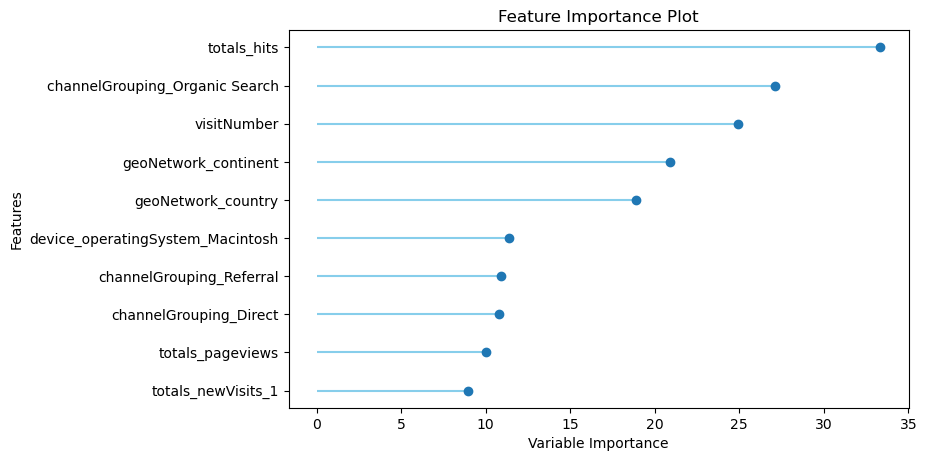

In [19]:
plot_model(model_elastic, plot='feature')

In [20]:
tuned_elastic = tune_model(model_elastic)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1293.0214,2287657.1663,1512.5003,0.0063,0.9759,3.7259
1,1260.9088,2140775.2816,1463.1388,0.0024,0.9182,6.1177
2,1249.9319,2144023.3771,1464.2484,-0.0052,0.9365,4.8549
3,1268.3806,2190220.0820,1479.9392,0.0022,0.9341,1.9922
4,1195.3574,1945032.2439,1394.6441,0.0036,0.8733,1.9178
5,1273.7473,2179898.1293,1476.4478,0.0008,1.0141,9.2965
6,1217.9531,2047628.6898,1430.9538,-0.0019,1.0603,9.4133
7,1258.3057,2142457.4283,1463.7136,0.0039,0.9818,3.0511
8,1254.4270,2182923.7447,1477.4721,-0.0017,1.0167,6.0679
9,1210.5408,2063513.0391,1436.4933,0.0003,0.9844,8.7851


**Catboost:**

In [21]:
model_ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1295.9086,2297311.5733,1515.6885,0.0021,0.9755,3.7281
1,1263.1591,2138450.3624,1462.3441,0.0035,0.9211,6.1751
2,1252.3974,2149572.6669,1466.1421,-0.0078,0.9396,4.8449
3,1267.5997,2189686.1272,1479.7588,0.0024,0.9364,2.0048
4,1196.9346,1943559.3486,1394.1160,0.0043,0.8728,1.8892
5,1275.5981,2186559.0286,1478.7018,-0.0023,1.0160,9.3084
6,1218.7252,2052428.3667,1432.6299,-0.0042,1.0625,9.9014
7,1260.5258,2147317.3585,1465.3728,0.0017,0.9844,3.0800
8,1259.2744,2198061.5339,1482.5861,-0.0086,1.0197,6.0539
9,1208.1491,2058487.8247,1434.7431,0.0027,0.9846,8.6810


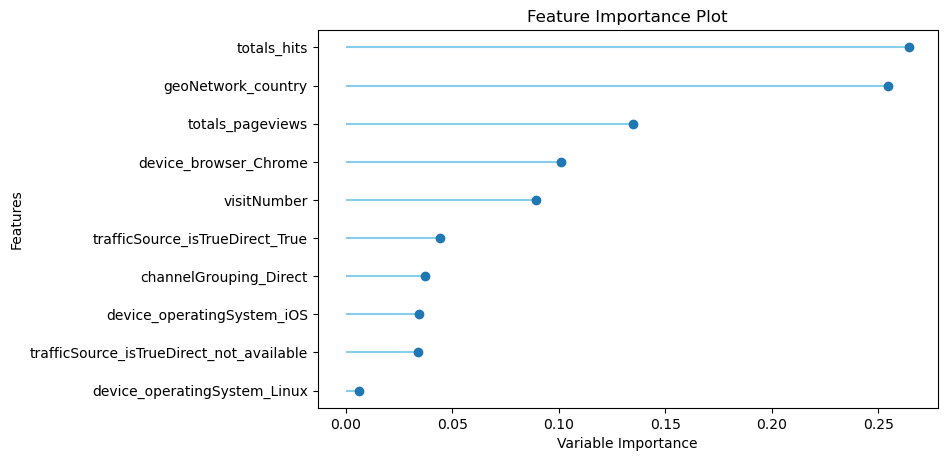

In [22]:
plot_model(model_ada, plot = 'feature')

In [23]:
tuned_ada = tune_model(model_ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1295.7854,2297053.5652,1515.6034,0.0022,0.9775,3.7516
1,1262.9945,2138760.6623,1462.4502,0.0034,0.9189,6.0731
2,1248.8649,2139210.0758,1462.6039,-0.0029,0.9394,4.9228
3,1269.8410,2192444.1477,1480.6904,0.0012,0.9374,2.0170
4,1195.4683,1944338.7564,1394.3955,0.0039,0.8755,1.9457
5,1276.4710,2189072.6238,1479.5515,-0.0034,1.0176,9.3970
6,1218.4763,2049576.4056,1431.6342,-0.0028,1.0629,9.9048
7,1259.7513,2143552.9185,1464.0877,0.0034,0.9843,3.0740
8,1255.3499,2181647.7995,1477.0402,-0.0011,1.0192,6.0616
9,1208.8692,2061877.4028,1435.9239,0.0011,0.9864,8.7217


**For Lasso regression:**

In [24]:
model_lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1292.4209,2286375.7720,1512.0766,0.0068,0.9760,3.7330
1,1260.1246,2148831.7731,1465.8894,-0.0013,0.9197,6.2271
2,1251.3814,2152283.1762,1467.0662,-0.0091,0.9371,4.8279
3,1267.3357,2194947.8565,1481.5356,0.0001,0.9348,1.9959
4,1192.7076,1941002.4035,1393.1986,0.0056,0.8730,1.9169
5,1272.3093,2180010.3857,1476.4858,0.0007,1.0141,9.3223
6,1217.5354,2049274.3295,1431.5287,-0.0027,1.0600,9.1798
7,1256.7664,2145175.0606,1464.6416,0.0027,0.9822,3.0670
8,1256.9649,2190932.8847,1480.1800,-0.0053,1.0175,6.0871
9,1212.8516,2070847.6959,1439.0440,-0.0033,0.9853,8.9375


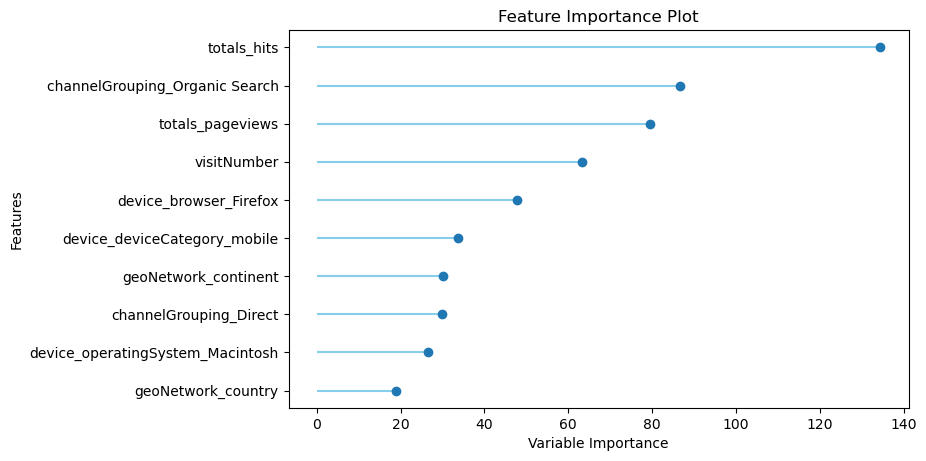

In [25]:
plot_model(model_lasso, plot='feature')

In [26]:
tuned_lasso = tune_model(model_lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1293.9870,2291965.4072,1513.9238,0.0044,0.9763,3.7367
1,1262.3951,2141427.9915,1463.3619,0.0021,0.9179,6.1040
2,1249.8606,2146460.0664,1465.0802,-0.0063,0.9370,4.8989
3,1268.1990,2191012.4823,1480.2069,0.0018,0.9344,1.9959
4,1195.2206,1944438.8216,1394.4314,0.0039,0.8735,1.9266
5,1273.4347,2180304.9254,1476.5856,0.0006,1.0143,9.3496
6,1216.9990,2046609.8720,1430.5977,-0.0014,1.0605,9.5312
7,1257.7293,2141180.2173,1463.2772,0.0045,0.9817,3.0508
8,1255.6565,2185729.0090,1478.4211,-0.0029,1.0172,6.0557
9,1209.7643,2061604.3696,1435.8288,0.0012,0.9840,8.7447


**For Support Vector Machine**

In [27]:
model_svm = create_model('svm', C=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1284.5318,2298581.9186,1516.1075,0.0015,0.9746,3.7888
1,1256.3871,2157116.1380,1468.7124,-0.0052,0.9168,5.9900
2,1246.3678,2162819.5141,1470.6528,-0.0140,0.9352,4.7042
3,1258.9203,2197186.3873,1482.2909,-0.0010,0.9297,1.9499
4,1185.2200,1942380.7848,1393.6932,0.0049,0.8691,1.8956
5,1258.0933,2173603.3130,1474.3145,0.0036,1.0098,9.0201
6,1220.7827,2057769.5459,1434.4928,-0.0068,1.0570,9.2633
7,1244.2499,2141055.7302,1463.2347,0.0046,0.9783,3.0183
8,1265.3510,2237914.3203,1495.9660,-0.0269,1.0173,6.0444
9,1198.4614,2040964.8779,1428.6234,0.0112,0.9762,8.4505


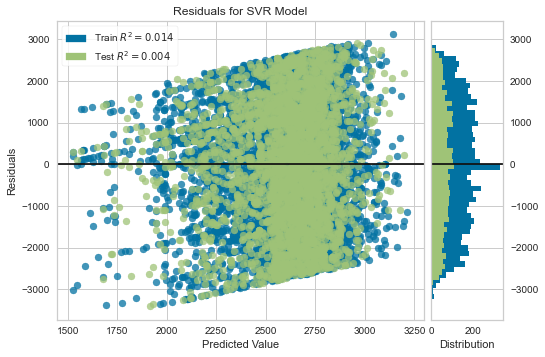

In [28]:
plot_model(model_svm)

**For Bayesian ridge regressor**

In [29]:
create_bridge = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1293.0323,2287698.7608,1512.5141,0.0062,0.9759,3.7256
1,1260.7566,2140757.2132,1463.1327,0.0025,0.9183,6.1206
2,1250.1005,2144692.3045,1464.4768,-0.0055,0.9365,4.8491
3,1268.3608,2190659.1206,1480.0875,0.0020,0.9342,1.9923
4,1195.4285,1945164.5790,1394.6916,0.0035,0.8733,1.9179
5,1273.7087,2179843.6958,1476.4294,0.0008,1.0141,9.2950
6,1217.9585,2047643.5358,1430.9590,-0.0019,1.0603,9.4091
7,1258.2220,2142473.4954,1463.7191,0.0039,0.9819,3.0517
8,1254.4538,2183395.4386,1477.6317,-0.0019,1.0167,6.0721
9,1210.6225,2063818.8982,1436.5998,0.0001,0.9844,8.7974


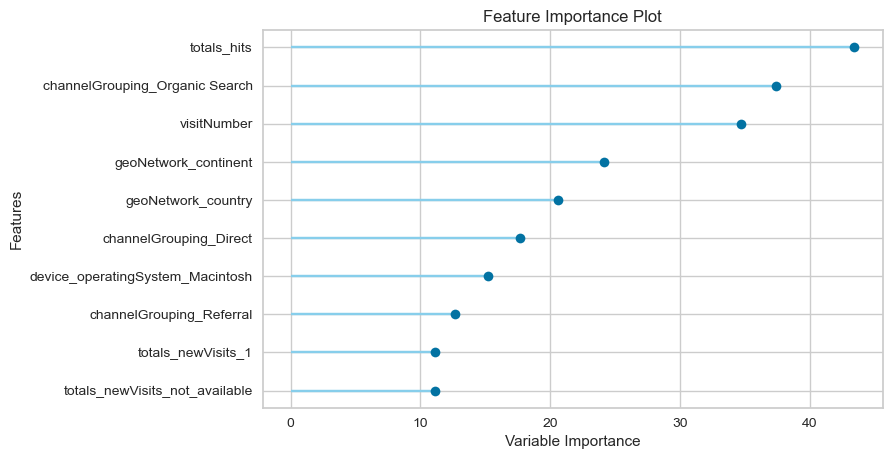

In [30]:
plot_model(create_bridge, plot='feature')

In [31]:
tuned_bridge = tune_model(create_bridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1293.0323,2287698.7502,1512.5140,0.0062,0.9759,3.7256
1,1260.7566,2140757.2126,1463.1327,0.0025,0.9183,6.1206
2,1250.1005,2144692.3160,1464.4768,-0.0055,0.9365,4.8491
3,1268.3608,2190659.1292,1480.0875,0.0020,0.9342,1.9923
4,1195.4285,1945164.5711,1394.6916,0.0035,0.8733,1.9179
5,1273.7087,2179843.6927,1476.4294,0.0008,1.0141,9.2950
6,1217.9585,2047643.5361,1430.9590,-0.0019,1.0603,9.4091
7,1258.2220,2142473.4946,1463.7191,0.0039,0.9819,3.0517
8,1254.4538,2183395.4482,1477.6317,-0.0019,1.0167,6.0721
9,1210.6225,2063818.9049,1436.5998,0.0001,0.9844,8.7974


## Fin-tune modellen
Bruker tune_model på modellene vi lagde for Passive Aggressive Regressor, Support Vector Machine, Gradient Boosting Regressor, Elastic Net og CatBoost Regressor. Deretter stackes disse oppå hverandre ved hjelp av stack_models:
Stacking er en variant av ensembling der man stabler modellene med modellen på topp (metamodellen) og denne genererer den endelige prediksjonen. 

In [32]:
stacker = stack_models(estimator_list = [tuned_lasso, model_svm, tuned_ada, tuned_elastic], meta_model = tuned_bridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1289.7805,2287302.3801,1512.3830,0.0064,0.9757,3.7591
1,1259.7125,2138613.4381,1462.3999,0.0035,0.9174,6.0544
2,1244.4211,2137142.8446,1461.8970,-0.0020,0.9367,4.8403
3,1263.6522,2184842.3802,1478.1212,0.0047,0.9335,1.9881
4,1191.2681,1936519.8397,1391.5890,0.0079,0.8721,1.9226
5,1268.2772,2171941.0607,1473.7507,0.0044,1.0137,9.2635
6,1218.4101,2044929.3425,1430.0103,-0.0005,1.0604,9.6327
7,1251.6639,2132767.0037,1460.3996,0.0084,0.9809,3.0458
8,1257.2526,2193163.0407,1480.9332,-0.0064,1.0177,6.0409
9,1202.3893,2044080.8561,1429.7136,0.0097,0.9817,8.6236


### Analyse/plots av modellen
Bruker pycarets verktøy til å blant annet se på:
-	Residual: predikert verdi og faktisk verdi (ønsker at denne skal være 0)
-	Error: ønsker å få den diagonale linjen
-	Læringskurver: hvordan treningsscore endres etter flere treningsinstanser og hvordan valideringen endres etter flere treningsinstanser. 
o	Kan indikere over/underfitting
o	Er det vits å samle mer data?
-	Feature-importance: ser på «viktigheten» til hvert enkelt attributt. 


### Lagre modellen
Vi lagrer modellen ved å bruke pycarets save_model-funksjon (eventuelt joblib)
TBA

In [33]:
best_model = automl(optimize = 'RMSLE')

In [34]:
finalize = finalize_model(best_model)

In [35]:
predictions = predict_model(finalize)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regressor,1215.5747,2.086322e+06,1444.4105,0.0172,0.9584,6.8534


In [36]:
save_model(finalize, 'finalized_model_17_nov')

Transformation Pipeline and Model Succesfully Saved
